# Ford GoBike System Data
## by Ebtihal Alkhalifah

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe, print statistics
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

# Assessing Dataset

In [3]:
# high-level overview of data shape and composition
print(bikes.shape)
print(bikes.dtypes)
print(bikes.head())

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
#Check dublicates
sum(bikes.duplicated())

0

In [5]:
# Finding how many unique bikes 
bikes.bike_id.nunique()

4646


## Quality issues

1- Change types of attributes to more approprite types.<br>
2- Creat new culomn "member_age". <br>
3-Delete entries with "member_age" > 70.<br>
4- Convert duration from Seconds to minutes.<br>
5- Show the day of week.<br>
6- Show the hour of day.


# Cleaning the dataset

Define: 1- Change types of attributes to more approprite types. 

In [6]:

# Change the types of data
#Code
bikes.start_time = pd.to_datetime(bikes.start_time)
bikes.end_time = pd.to_datetime(bikes.end_time)
bikes.start_station_id = bikes.start_station_id.astype(str)
bikes.end_station_id = bikes.end_station_id.astype(str)
bikes.bike_id = bikes.bike_id.astype(str)
bikes.member_gender = bikes.member_gender.astype('category')
bikes.user_type = bikes.user_type.astype('category')
#bikes.member_birth_year = pd.to_datetime(bikes.member_birth_year, format='%Y')

In [7]:
#Test
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

Define: 2- Creat new culomn "member_age"

In [8]:
#Code
bikes['member_age']= 2019 - bikes.member_birth_year
#Test
bikes['member_age'].describe()


count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

The above table shows that the max age is 141 which is clearly an outlier.

Define: 3-Delete entries with "member_age" > 70

In [9]:

bikes['member_age_above70'] = bikes['member_age']>70

bikes['member_age_above70'].value_counts()[0] 

182837

In [10]:
#The total number of member_age_above70 
bikes['member_age_above70'].value_counts()[1] 

575

In [11]:
#Code
# Delete member_age <= 70
bikes = bikes.query('member_age <=70')
#Check
bikes['member_age'].describe()

count    174572.000000
mean         34.035739
std           9.712795
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          70.000000
Name: member_age, dtype: float64

Define: 4- Convert duration from Seconds to minutes 

In [12]:
#Code
# Creat columns duration_minute columns
bikes['duration_minute'] = round((bikes['duration_sec'] / 60).astype(float))
#Test
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,member_age_above70,duration_minute
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,False,870.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,False,1031.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,False,608.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,False,26.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,False,30.0


Define: 5- Show the day of week.

In [45]:
# Code

bikes['start_weekday_num'] = bikes['start_time'].apply(lambda time: time.dayofweek)
daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bikes['weekday'] = bikes['start_weekday_num'].map(daymap)
week_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
bikes.weekday = pd.Categorical(bikes.weekday, categories= week_order, ordered=True)



#bikes.weekday = pd.Categorical(bikes.weekday, categories= daymap, ordered=True)


#Check
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,member_age_above70,duration_minute,start_weekday_num,weekday,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,35.0,False,870.0,3,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,47.0,False,1031.0,3,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,30.0,False,608.0,3,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,45.0,False,26.0,3,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,60.0,False,30.0,3,Thu,23


Define: 6- Show the hour of day.

In [33]:
#Code
bikes['start_time_hour'] = bikes['start_time'].dt.hour
#Check
bikes.head()

<ipython-input-33-e4f699b5dce5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes['start_time_hour'] = bikes['start_time'].dt.hour


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,member_age_above70,duration_minute,start_weekday_num,weekday,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,35.0,False,870.0,3,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,47.0,False,1031.0,3,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,30.0,False,608.0,3,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,45.0,False,26.0,3,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,60.0,False,30.0,3,Thu,23


### What is the structure of your dataset?

> There are 4646 bikes in the dataset with 16 features
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.

### What is/are the main feature(s) of interest in your dataset?

>The highest trip duration.
The highest age range using the bikes.

what kind of a user took the most ride
which gender took the most rides

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that trip duration will have the strongest effect!

## Univariate Exploration


I'll start by looking at the distribution of the main variable of interest: ride duration.

<b> Trip duration in min

Trip duration in the dataset take on a small range of values, from about 5 minutes at the lowest, to about 30 minutes at the highest.

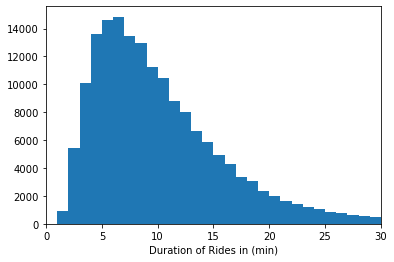

In [34]:
# start with a standard-scaled plot


bins = np.arange(0, bikes['duration_minute'].max(), 1)
plt.hist(data = bikes, x = 'duration_minute', bins = bins)
plt.xlim([0,30])
plt.xlabel('Duration of Rides in (min)')
plt.show()

> The plot shows that the highest duration is between 5 to 10 minutes, and a clear decrease where the minutes decrease.<br>
Next step is to check in what range of age are users most using the bikes.

<b>Members age distrbution.

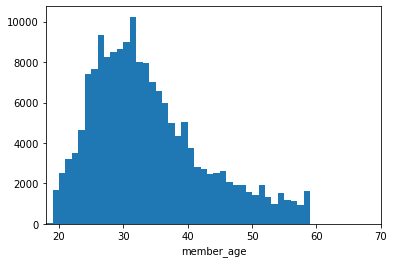

In [35]:
bins = np.arange(0, bikes['member_age'].max(), 1)
plt.hist(data = bikes, x = 'member_age', bins = bins)
plt.xlim([18,70]) #the min and max of 'member_age' values
plt.xlabel('member_age')
plt.show()

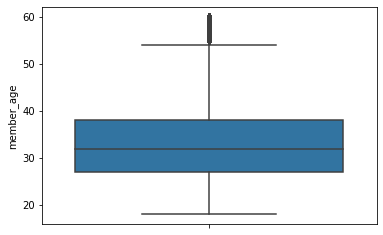

In [36]:
sb.boxplot(data = bikes, y = 'member_age')
plt.show()

> The plot shows that the highest range of users are in age of between 25 to 35, the histogram is between ages 18 and 70 wich is the min and max vlues of 'member_age' attribute calculated earlier but reconsidering the chart I recalculated the outliers.<br>

By calculating the IQR<br>
Q1 = 28<br>
Q3 = 40<br>
IOR = Q3 - Q1 = 40 - 28 = 12<br>
The upper outliner bound:<br>
(Q3 + 1.5*IQR) = (40 + 1.5*12) = 40+(1.5 * 12) = 58<br>


In [37]:
#Code
# Delete member_age <= 60
bikes = bikes.query('member_age <=60')
#Check
bikes['member_age'].describe()

count    171617.000000
mean         33.520782
std           8.953751
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max          60.000000
Name: member_age, dtype: float64

>Next step is to check in whether the majority are subscribers or customers, Also are they male or female.

<b> User type and member gender distibution.

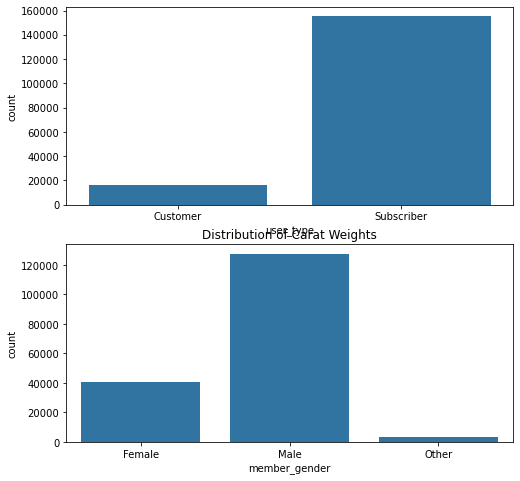

In [38]:


fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
plt.title('Distribution of Carat Weights')
sb.countplot(data = bikes, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = bikes, x = 'member_gender', color = default_color, ax = ax[1])
plt.show();




> The bar chart shows that the highest range of users are subscribers with clearly a huge difference.<br>
and male members are almost triple the total count of female.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip duration is seconds is taking large range of values which is unneeded in some cases, so a duration in minutes was created to make it easier to visualize. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the age variable, a number of outlier points were identified.For safety, all of these points were removed from the dataset to move forwards.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in the
dataset.

<b> Trip duration vs Age

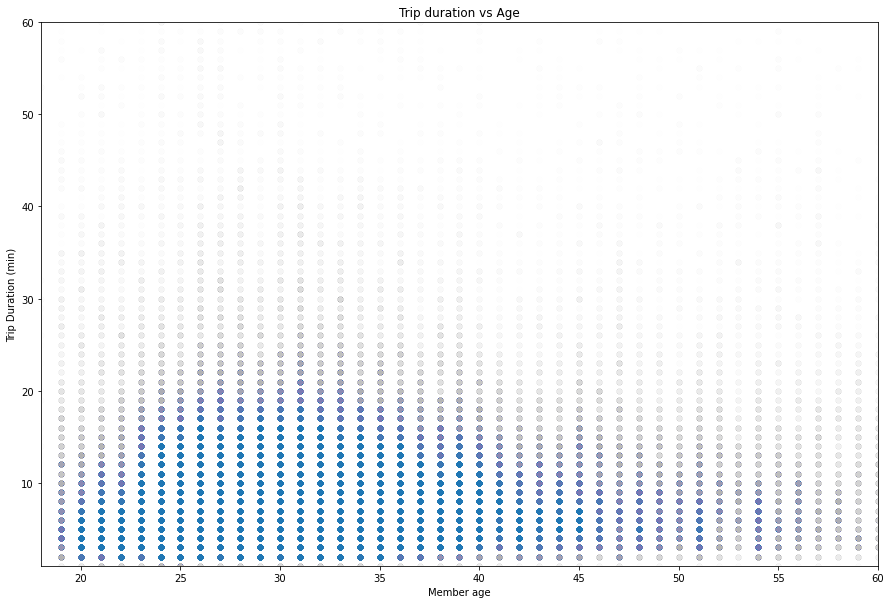

In [39]:

plt.figure(figsize = [15,10])
plt.scatter(data = bikes, x = 'member_age', y = 'duration_minute', alpha = 0.005)
plt.axis([18, 60, 1, 60])
plt.title('Trip duration vs Age')
plt.xlabel('Member age')
plt.ylabel('Trip Duration (min)');

The users between 25 to 35 years old, take the longest trip duration.<br>
Next step is to see what days of week have highest trip duration.

<b> Days of week with highest trip duration.

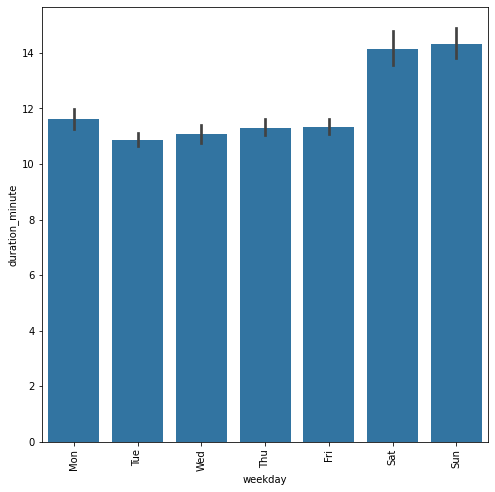

In [46]:
#Days of week with highest trip duration.
plt.figure(figsize = [8, 8])
sb.barplot(data = bikes, x = 'weekday', y = 'duration_minute', color = sb.color_palette()[0])
plt.xticks(rotation=90)
plt.show()

This shows that in weekends users are usually make the longer trip duration wich makes sencse.<br>
Next is to check the gender vs age.

<b>Gender vs Age.

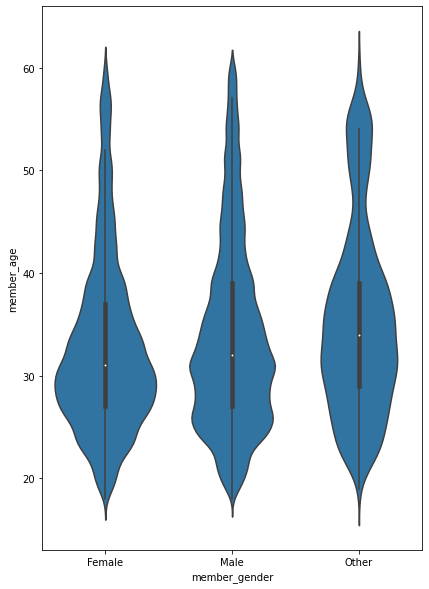

In [47]:
plt.figure(figsize = [15, 10])
plt.subplot(1, 2, 1)
g1 = sb.violinplot(data = bikes, x = 'member_gender', y = 'member_age', color = sb.color_palette()[0])

1- females: a clear decrease after 30 years old.<br>
2- males: compared to females the users are more likely to start using the bikes in a younger age.<br>
3- others: since thier total is minor and they might be misentered data, will not take it in consideration. <br>

Next, let's look at relationships between the three categorical features.

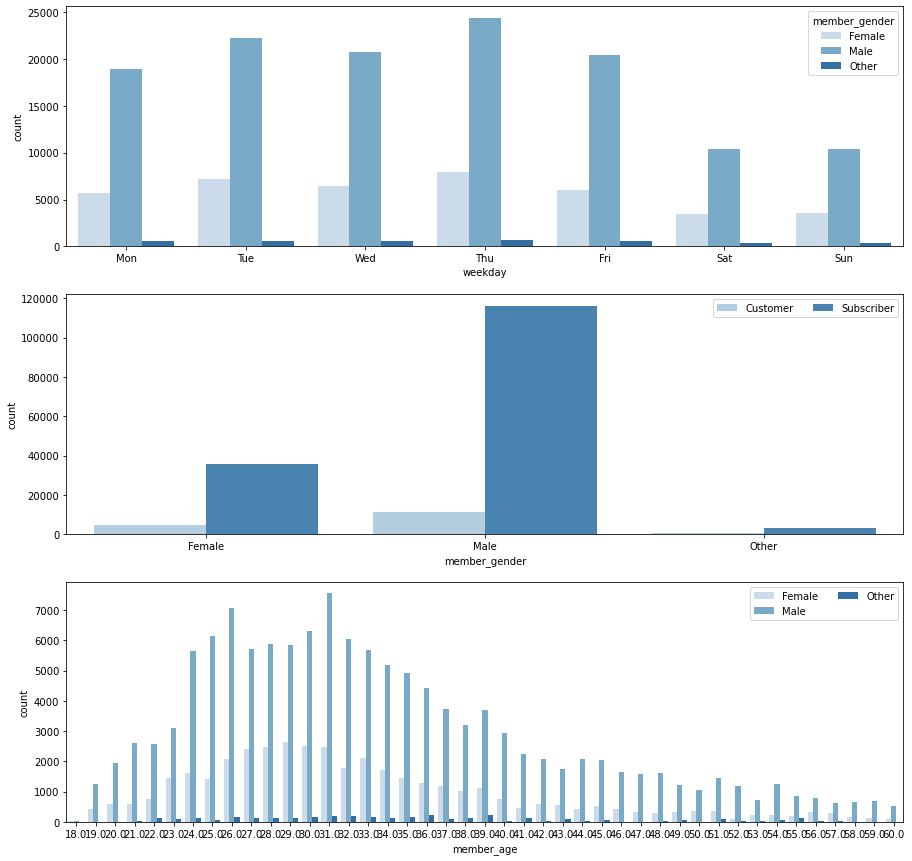

In [48]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [15, 15])

# subplot 1: weekday vs member_gender
plt.subplot(3, 1, 1)
sb.countplot(data = bikes, x = 'weekday', hue = 'member_gender', palette = 'Blues')

# subplot 2: member_gender vs. user_type
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bikes, x = 'member_gender', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: member_age vs. member_gender
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bikes, x = 'member_age', hue = 'member_gender', palette = 'Blues')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

Subplot1: Although as seen earlier that in weekends users usually make longer trip duration but it seems thaat the users in weekends are usually less than users in weekdays.<br>
Subplot2: The subscribers are much more than customers for all gender types. <br>
Subplot3: this again proves that the users in age 25 to 35 are the majority, and males total in each age period are almost triple the total of females.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. 

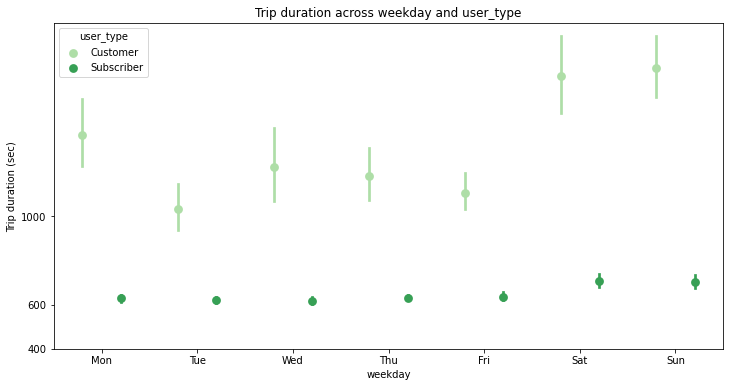

In [49]:
fig, ax = plt.subplots(ncols = 1, figsize = [12,6])

sb.pointplot(data = bikes, x = 'weekday', y = 'duration_sec', hue = 'user_type',
             palette = 'Greens', linestyles = '', dodge = 0.4)
ax.set_title('Trip duration across weekday and user_type')
ax.set_ylabel('Trip duration (sec)')
#ax.set_yscale('log')
ax.set_yticks([400, 600, 1000])
ax.set_yticklabels(['400', '600', '1000'])
ax.set_yticklabels([],minor = True)


plt.show();

The plot above shows that the customers are playing a good rule in making the trip duration longer in weekends. 

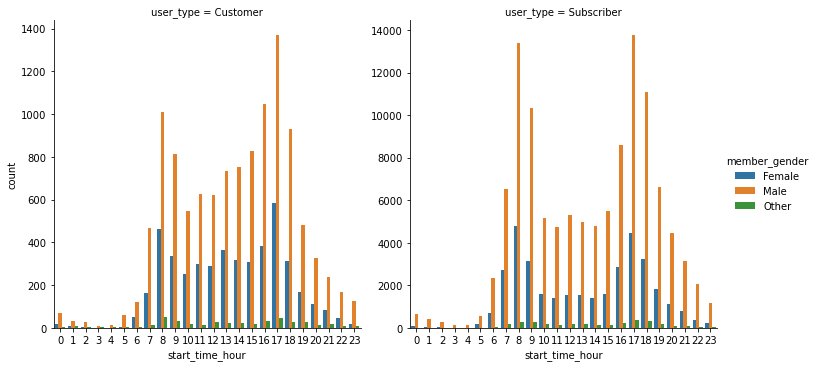

In [50]:
g = sb.catplot(data= bikes, x = 'start_time_hour', col = 'user_type', hue= 'member_gender', kind = 'count', sharey= False)

The graphs show that in early morning 8 - 9 am and in late afternoon 4 - 6 pm useres usually take more bikes, in regard with the user type. 